In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

Put the hyparameters at the top like this to make it easier to change and edit.

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [4]:
df  = pd.read_csv('data\mental_health_posts_scraped.csv', encoding="UTF-8", index_col= 'Unnamed: 0')

df.rename(columns = {"Origin":'labels'}, inplace = True)

In [5]:
df.sample(1)

,Title,Post Text,ID,Score,Total Comments,labels,Post URL,text
15964,Mania and Spiritual Awakenings Part II: The Ka...,This post isn't meant to review the album that...,doanm1,0,2,bipolar,https://www.reddit.com/r/bipolar/comments/doan...,Mania and Spiritual Awakenings Part II: The Ka...


In [6]:
articles = df['text'].values
labels = df['labels'].values

print(len(labels))
print(len(articles))

19687
19687


In [7]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

15749
15749
15749
3938
3938


In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [9]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'and': 4,
 'the': 5,
 'a': 6,
 'my': 7,
 'of': 8,
 'it': 9,
 'me': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [10]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [11]:
print(train_sequences[10])

[55, 83, 626, 1016, 3584, 58, 140, 22, 931, 32, 83, 119, 1873, 97, 16, 386, 99, 626, 551, 6, 427, 1577, 3584, 27, 32, 83, 70, 626, 6, 1577, 3584, 4, 1148, 3, 1388, 659, 111, 50, 3, 11, 1449, 1577, 729]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [12]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [13]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

93
200
21
200
43
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [14]:
print(train_sequences[10])

[55, 83, 626, 1016, 3584, 58, 140, 22, 931, 32, 83, 119, 1873, 97, 16, 386, 99, 626, 551, 6, 427, 1577, 3584, 27, 32, 83, 70, 626, 6, 1577, 3584, 4, 1148, 3, 1388, 659, 111, 50, 3, 11, 1449, 1577, 729]


In [15]:
print(train_padded[10])

[  55   83  626 1016 3584   58  140   22  931   32   83  119 1873   97
   16  386   99  626  551    6  427 1577 3584   27   32   83   70  626
    6 1577 3584    4 1148    3 1388  659  111   50    3   11 1449 1577
  729    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [16]:
print(train_sequences[0])

[4690, 46, 3, 5, 1530, 555, 11, 13, 2245, 140, 16, 13, 10, 82, 45, 10, 265, 96, 138, 136, 82, 320, 7, 392, 14, 6, 241, 140, 2, 47, 1522, 2, 52, 26, 68, 3529, 127, 15, 86, 13, 94, 1, 571, 31, 73, 230, 3, 85, 3, 113, 139, 92, 1954, 1009, 50, 108, 368, 794, 75, 2020, 1237, 288, 368, 363, 270, 3, 277, 23, 6, 648, 73, 15, 451, 9, 202, 119, 63, 281, 65, 63, 1380, 376, 3922, 75, 232, 4, 73, 563, 206, 1003, 33, 5, 56]


In [17]:
print(train_padded[0])

[4690   46    3    5 1530  555   11   13 2245  140   16   13   10   82
   45   10  265   96  138  136   82  320    7  392   14    6  241  140
    2   47 1522    2   52   26   68 3529  127   15   86   13   94    1
  571   31   73  230    3   85    3  113  139   92 1954 1009   50  108
  368  794   75 2020 1237  288  368  363  270    3  277   23    6  648
   73   15  451    9  202  119   63  281   65   63 1380  376 3922   75
  232    4   73  563  206 1003   33    5   56    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [18]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

3938
(3938, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [19]:
print(set(labels))

{'depression', 'schizophrenia', 'BPD', 'autism', 'bipolar', 'Anxiety'}


In [20]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [21]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[2]
[2]
(15749, 1)
[6]
[6]
[6]
(3938, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

had anyone noticed memory decline from depression just curious if anyone else affected by this problem also noticed quite a big cognitive decline or if anyone has noticed a cognitive decline and managed to build themselves back up to that previous cognitive level ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
Had anyone noticed memory decline from depression?Just curious if anyone else affected by this problem also noticed quite a big cognitive decline. Or if anyone has noticed a cognitive decline and managed to build themselves back up to that previous cognitive level.


Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [23]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 394,759
Trainable params: 394,759
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights= True)

In [29]:
num_epochs = 100
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/100
493/493 - 48s - loss: 1.0869 - accuracy: 0.5955 - val_loss: 1.3421 - val_accuracy: 0.5274 - 48s/epoch - 97ms/step
Epoch 2/100
493/493 - 47s - loss: 0.9418 - accuracy: 0.6670 - val_loss: 1.2364 - val_accuracy: 0.6013 - 47s/epoch - 96ms/step
Epoch 3/100
493/493 - 48s - loss: 0.8604 - accuracy: 0.7030 - val_loss: 1.3416 - val_accuracy: 0.5665 - 48s/epoch - 97ms/step
Epoch 4/100
493/493 - 47s - loss: 0.8046 - accuracy: 0.7273 - val_loss: 1.3448 - val_accuracy: 0.5818 - 47s/epoch - 96ms/step
Epoch 5/100
493/493 - 47s - loss: 0.7607 - accuracy: 0.7502 - val_loss: 1.4347 - val_accuracy: 0.5843 - 47s/epoch - 96ms/step
Epoch 6/100
493/493 - 48s - loss: 0.7289 - accuracy: 0.7626 - val_loss: 1.4438 - val_accuracy: 0.5726 - 48s/epoch - 97ms/step
Epoch 7/100
493/493 - 47s - loss: 0.6953 - accuracy: 0.7814 - val_loss: 1.3518 - val_accuracy: 0.6059 - 47s/epoch - 96ms/step
Epoch 8/100
493/493 - 47s - loss: 0.6642 - accuracy: 0.7935 - val_loss: 1.5886 - val_accuracy: 0.5653 - 47s/epoch - 96

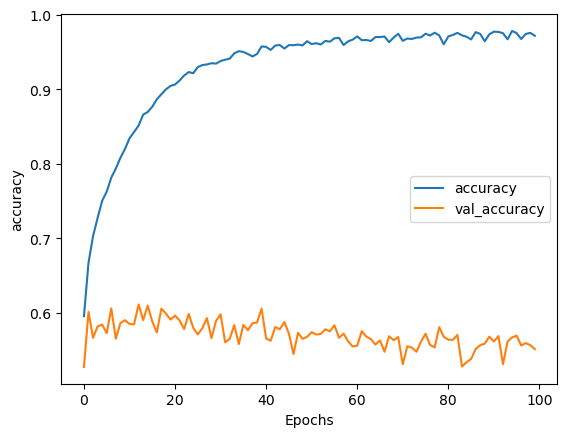

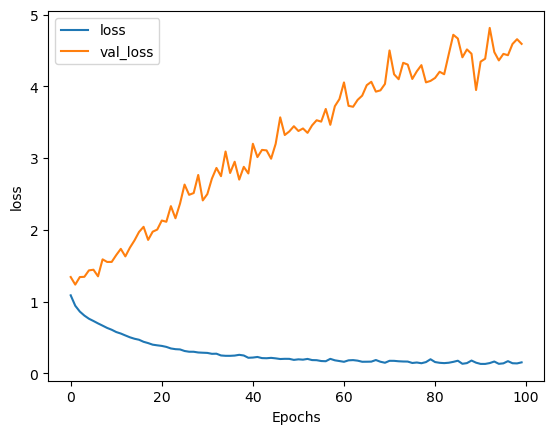

In [30]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [45]:
txt = df.sample(1, random_state= 42)['text'].values

text = [txt[0]]

["I expect I'll get crucified for this..but I'll say what I think and see..I work as a nurse in a psych ward. Point being I know bpd  and have far more of it than I confess or any one at work knows.\n\nBpd people van since others the same, we know each other and have understanding....\n\nEveryone says those with bpd have issues  they are attention sellers  they just manipulate people.. \n\nWell guess what... There wrong ... those with bpd, the ones I have met are sensitive  they think fast, they can walk into a room and know straight away. Those they like and those to avoid.. they are more empathetic than people realise  even themselves.. :) they are the best friends to have. They are honest beyond belief, sure we can change  our moods,  but it comes from being sensitive and hyper vigilant..\n\nDo you know those with bpd also have a deep strength  we have complicated pasts and we fight...we always fight back.\n\nYpu have many good qualities but we deny ourselves of this...\n\nAll I am 

In [50]:
seq = tokenizer.texts_to_sequences(text)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)

labels = list(set(df['labels'].values))
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 33ms/step
[[4.7706319e-08 2.0675467e-01 1.9698320e-02 5.0645262e-01 1.8453985e-01
  2.3190770e-03 8.0235422e-02]] autism
